In [1]:
! cp ./armmoc/bin/usgsmoc.exe ./
! cp ./armmoc/example01/MOC01.INP ./
! cp ./armmoc/example01/moc01.sup ./
! ./usgsmoc.exe < moc01.sup ;
# next line lists output file on server - probably want to use an editor to parse the file for map making
! cat MOC01-NO-D.OUT ;

/bin/bash: line 1: ./usgsmoc.exe: cannot execute binary file: Exec format error


1U.S.G.S. METHOD-OF-CHARACTERISTICS MODEL FOR SOLUTE TRANSPORT IN GROUND WATER
0Example 1 From Notes -- Zero Dispersion Simulation                              
 
0                     I N P U T     D A T A
0                       GRID DESCRIPTORS

             NX    (NUMBER OF COLUMNS)  =     9
             NY    (NUMBER OF ROWS)     =     9
             XDEL  (X-DISTANCE IN FEET) =   900.0
             YDEL  (Y-DISTANCE IN FEET) =   900.0
0                       TIME  PARAMETERS

             NTIM   (MAX. NO. OF TIME STEPS)       =      1
             NPMP   (NO. OF PUMPING PERIODS)       =      1
             PINT   (PUMPING PERIOD IN YEARS)      =      2.000
             TIMX   (TIME INCREMENT MULTIPLIER)    =      0.00
             TINIT  (INITIAL TIME STEP IN SEC.)    =      0.
0              HYDROLOGIC AND CHEMICAL PARAMETERS

             S       (STORAGE COEFFICIENT)       =      0.000000
             POROS   (EFFECTIVE POROSITY)        =      0.300
             BETA    (LONGI

In [2]:
! cat MOC01-YES-D.OUT ;

1U.S.G.S. METHOD-OF-CHARACTERISTICS MODEL FOR SOLUTE TRANSPORT IN GROUND WATER
0Example 1 From Notes -- Non-Zero Dispersion Simulation                          
 
0                     I N P U T     D A T A
0                       GRID DESCRIPTORS

             NX    (NUMBER OF COLUMNS)  =     9
             NY    (NUMBER OF ROWS)     =     9
             XDEL  (X-DISTANCE IN FEET) =   900.0
             YDEL  (Y-DISTANCE IN FEET) =   900.0
0                       TIME  PARAMETERS

             NTIM   (MAX. NO. OF TIME STEPS)       =      1
             NPMP   (NO. OF PUMPING PERIODS)       =      1
             PINT   (PUMPING PERIOD IN YEARS)      =      2.000
             TIMX   (TIME INCREMENT MULTIPLIER)    =      0.00
             TINIT  (INITIAL TIME STEP IN SEC.)    =      0.
0              HYDROLOGIC AND CHEMICAL PARAMETERS

             S       (STORAGE COEFFICIENT)       =      0.000000
             POROS   (EFFECTIVE POROSITY)        =      0.300
             BETA    (LONGI

In [3]:
ascii_array = [
[    0 ,   0 ,   0 ,   0 ,  0   , 0   , 0   , 0   , 0],
[    0 ,   0 ,   2 ,   0 ,   0  ,  0  ,  0  ,  0  ,  0],
[    0 ,   0 ,   3 ,   1 ,   0  ,  0  ,  0  ,  1  ,  0],
[    0 ,   0 ,   3 ,   5 ,   3  ,  2   , 2  ,  2  ,  0],
[    0 ,   1 ,  37 ,  20 ,   9  ,  8  ,  8  ,  8  ,  0],
[    0 ,   1 ,  21 ,  55 ,  46  , 28  , 54  , 43  ,  0],
[    0 ,   0 ,   5 ,  10 ,   7  ,  6  ,  4  ,  4  ,  0],
[    0 ,   0 ,   1 ,   3 ,   1  ,  0  ,  0  ,  0  ,  0],
[    0 ,   0 ,   0 ,   0 ,   0  ,  0  ,  0  ,  0  ,  0],
]

distancex=[-450,450,1350,2250,3150,4050,4950,5850,6750]
distancey=[-450,450,1350,2250,3150,4050,4950,5850,6750]
distancey.reverse()

type(distancex)

list

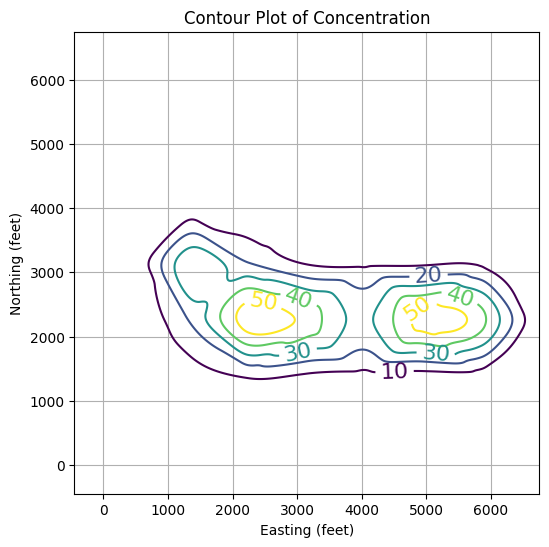

In [4]:
############# Contour Plot
nrows=9
ncols=9
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
#        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
        my_xyz.append([distancex[jcol],distancey[irow],ascii_array[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 3000)
lat = numpy.linspace(min(coord_y), max(coord_y), 800)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(6, 6)
levels1 = [10,20,30,40,50]
CS = ax.contour(X, Y, Z, levels1)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_xlabel('Easting (feet)')
ax.set_ylabel('Northing (feet)')
ax.set_title('Contour Plot of Concentration')
ax.grid(True)  # Turns on the grid

In [5]:
! cp ./armmoc/bin/usgsmoc.exe ./
! cp ./armmoc/example08/MOC08.INP ./
! cp ./armmoc/example08/moc08.sup ./
! ./usgsmoc.exe < moc08.sup ;
# next line lists output file on server - probably want to use an editor to parse the file for map making
! cat MOC08-TRY1.OUT ;

/bin/bash: line 1: ./usgsmoc.exe: cannot execute binary file: Exec format error


1U.S.G.S. METHOD-OF-CHARACTERISTICS MODEL FOR SOLUTE TRANSPORT IN GROUND WATER
0Example 3 - Waste Injection Example File                                        
 
0                     I N P U T     D A T A
0                       GRID DESCRIPTORS

             NX    (NUMBER OF COLUMNS)  =    10
             NY    (NUMBER OF ROWS)     =    14
             XDEL  (X-DISTANCE IN FEET) =   150.0
             YDEL  (Y-DISTANCE IN FEET) =   150.0
0                       TIME  PARAMETERS

             NTIM   (MAX. NO. OF TIME STEPS)       =      1
             NPMP   (NO. OF PUMPING PERIODS)       =      1
             PINT   (PUMPING PERIOD IN YEARS)      =      0.250
             TIMX   (TIME INCREMENT MULTIPLIER)    =      0.00
             TINIT  (INITIAL TIME STEP IN SEC.)    =      0.
0              HYDROLOGIC AND CHEMICAL PARAMETERS

             S       (STORAGE COEFFICIENT)       =      0.000000
             POROS   (EFFECTIVE POROSITY)        =      0.200
             BETA    (LONGI

In [6]:
#! cp ./armmoc/bin/usgsmoc.exe ./
#! cp ./armmoc/example03/MOC03.INP ./
#! cp ./armmoc/example03/moc03.sup ./
! ./usgsmoc.exe < moc03.sup ;
# next line lists output file on server - probably want to use an editor to parse the file for map making
! cat MOC03-TRY1.OUT ;

/bin/bash: line 1: ./usgsmoc.exe: cannot execute binary file: Exec format error


1U.S.G.S. METHOD-OF-CHARACTERISTICS MODEL FOR SOLUTE TRANSPORT IN GROUND WATER
0GUADLUPE DELTA MODEL 20ROWS 11COLUMNS STEADY STATE                              
 
0                     I N P U T     D A T A
0                       GRID DESCRIPTORS

             NX    (NUMBER OF COLUMNS)  =    11
             NY    (NUMBER OF ROWS)     =    20
             XDEL  (X-DISTANCE IN FEET) =  1457.0
             YDEL  (Y-DISTANCE IN FEET) =  2296.0
0                       TIME  PARAMETERS

             NTIM   (MAX. NO. OF TIME STEPS)       =     10
             NPMP   (NO. OF PUMPING PERIODS)       =      2
             PINT   (PUMPING PERIOD IN YEARS)      =    100.000
             TIMX   (TIME INCREMENT MULTIPLIER)    =      0.00
             TINIT  (INITIAL TIME STEP IN SEC.)    =      0.
0              HYDROLOGIC AND CHEMICAL PARAMETERS

             S       (STORAGE COEFFICIENT)       =      0.000000
             POROS   (EFFECTIVE POROSITY)        =      0.500
             BETA    (LONGI

Text(0.5, 1.0, 'Contour Plot of Heads from Guadelupe Basin after 100 years pumping')

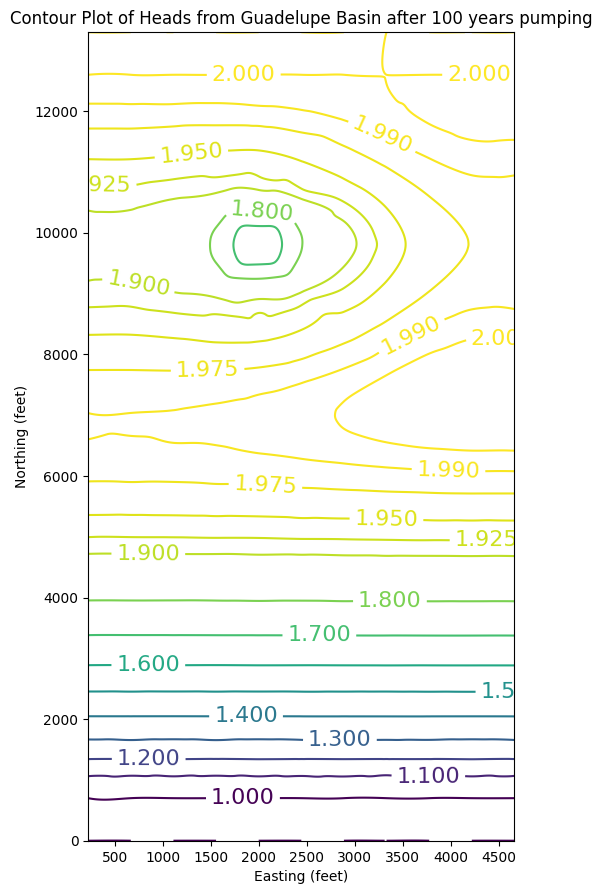

In [7]:
ascii_array=[
[2,2,2,2,2,2,2,2,2,2,2],
[2,2,2,2,2,2,2,2,2,2,2],
[1.9824704,1.9824704,1.9817755,1.9812523,1.9823327,1.9860897,1.9914353,1.9968044,2.0009695,2.0032144,2.0032144],
[1.9493786,1.9493786,1.9458412,1.9412092,1.9407227,1.9509342,1.9655228,1.9792917,1.9894292,1.9947191,1.9947191],
[1.9077647,1.9077647,1.8953256,1.8735055,1.8552067,1.8875707,1.9243329,1.9534483,1.9726357,1.9820581,1.9820581],
[1.8797366,1.8797366,1.8508128,1.7796579,1.6264312,1.7959227,1.8848174,1.9348898,1.9628007,1.9754839,1.9754839],
[1.9062448,1.9062448,1.8939348,1.8723718,1.8544265,1.8872218,1.9244401,1.953979,1.9734819,1.9830781,1.9830781],
[1.9459812,1.9459812,1.9427145,1.9386335,1.9389311,1.9501274,1.9657812,1.9805524,1.9914468,1.9971545,1.9971545],
[1.976452,1.976452,1.976164,1.9765218,1.9789592,1.9845336,1.9919303,1.9992708,2.0049506,2.0080323,2.0080323],
[1.9902456,1.9902456,1.9906493,1.9917361,1.9937963,1.9969799,2.0008261,2.0046107,2.0075548,2.009176,2.009176],
[1.9856354,1.9856354,1.9860716,1.9870122,1.9884389,1.9903391,1.9924731,1.9945204,1.9960834,1.9969483,1.9969483],
[1.9625396,1.9625396,1.9628748,1.9635591,1.9645021,1.9656767,1.9669334,1.9681117,1.9689833,1.9694683,1.9694683],
[1.9170766,1.9170766,1.9173128,1.9177851,1.918401,1.9191451,1.9199175,1.920631,1.9211405,1.9214248,1.9214248],
[1.8371684,1.8371684,1.8373234,1.8376294,1.8380111,1.8384659,1.8389282,1.8393522,1.8396425,1.8398047,1.8398047],
[1.7219858,1.7219858,1.7220795,1.7222678,1.7224904,1.7227548,1.7230192,1.7232617,1.7234179,1.7235076,1.7235076],
[1.5805758,1.5805758,1.5806312,1.5807443,1.5808709,1.5810217,1.5811706,1.5813077,1.58139,1.5814388,1.5814388],
[1.4130549,1.4130549,1.4130857,1.4131494,1.4132173,1.4132985,1.413378,1.4134515,1.4134926,1.4135177,1.4135177],
[1.2195073,1.2195073,1.219521,1.2195498,1.2195792,1.2196147,1.2196491,1.2196811,1.219698,1.2197086,1.2197086],
[1,1,1,1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1,1,1,1]
]

distancex=[0 for i in range(len(ascii_array[0]))]
distancey=[0 for j in range(len(ascii_array))]

deltax = 444
deltay = 700

distancex[0]=deltax/2

for i in range(1,len(distancex)):
    distancex[i]= distancex[i-1]+deltax


distancey[0]=deltay/2

for i in range(1,len(distancey)):
    distancey[i]= distancey[i-1]+deltay

dymax = max(distancey)

for i in range(len(distancey)):
    distancey[i]=dymax-distancey[i]


############# Contour Plot
nrows=len(distancey)
ncols=len(distancex)
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
#        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
        my_xyz.append([distancex[jcol],distancey[irow],ascii_array[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 1100)
lat = numpy.linspace(min(coord_y), max(coord_y), 2100)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(5.5, 10.5)
levels1 = [1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,1.925,1.95,1.975,1.99,2.0]
CS = ax.contour(X, Y, Z, levels1)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_xlabel('Easting (feet)')
ax.set_ylabel('Northing (feet)')
ax.set_title('Contour Plot of Heads from Guadelupe Basin after 100 years pumping')

Text(0.5, 1.0, 'Contour Plot of Concentration from Guadelupe Basin')

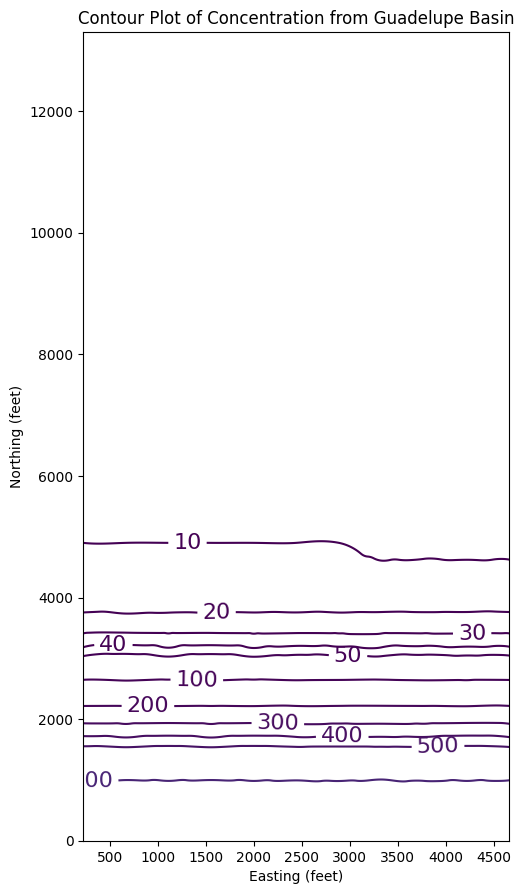

In [8]:
ascii_array=[
[0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0,0,0],
[1,1,1,1,1,1,1,1,1,1,1],
[5,5,5,5,5,5,5,5,5,5,5],
[7,7,7,7,7,7,7,7,7,7,7],
[10,10,10,10,10,10,10,9,9,9,9],
[13,13,13,13,13,13,13,13,13,13,13],
[27,27,27,27,27,27,27,27,27,27,27],
[76,76,76,76,76,76,76,76,76,76,76],
[237,237,237,237,237,237,237,237,237,237,237],
[612,612,612,612,612,612,612,612,612,612,612],
[1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215],
[1215,1215,1215,1215,1215,1215,1215,1215,1215,1215,1215]
]

distancex=[0 for i in range(len(ascii_array[0]))]
distancey=[0 for j in range(len(ascii_array))]

deltax = 444
deltay = 700

distancex[0]=deltax/2

for i in range(1,len(distancex)):
    distancex[i]= distancex[i-1]+deltax


distancey[0]=deltay/2

for i in range(1,len(distancey)):
    distancey[i]= distancey[i-1]+deltay

dymax = max(distancey)

for i in range(len(distancey)):
    distancey[i]=dymax-distancey[i]


############# Contour Plot
nrows=len(distancey)
ncols=len(distancex)
my_xyz = [] # empty list
for irow in range(nrows):
    for jcol in range(ncols):
#        my_xyz.append([distancex[0][jcol],distancey[0][irow],head[irow][jcol]])
        my_xyz.append([distancex[jcol],distancey[irow],ascii_array[irow][jcol]])
import pandas
my_xyz = pandas.DataFrame(my_xyz) # convert into a data frame
#print(my_xyz) # activate to examine the dataframe
import numpy 
import matplotlib.pyplot
from scipy.interpolate import griddata
# extract lists from the dataframe
coord_x = my_xyz[0].values.tolist() # column 0 of dataframe
coord_y = my_xyz[1].values.tolist() # column 1 of dataframe
coord_z = my_xyz[2].values.tolist() # column 2 of dataframe
coord_xy = numpy.column_stack((coord_x, coord_y))
# Set plotting range in original data units
lon = numpy.linspace(min(coord_x), max(coord_x), 1100)
lat = numpy.linspace(min(coord_y), max(coord_y), 2100)
X, Y = numpy.meshgrid(lon, lat)
# Grid the data; use linear interpolation (choices are nearest, linear, cubic)
Z = griddata(numpy.array(coord_xy), numpy.array(coord_z), (X, Y), method='cubic')
# Build the map
fig, ax = matplotlib.pyplot.subplots()
fig.set_size_inches(5.5, 10.5)
levels1 = [10,20,30,40,50,100,200,300,400,500,1000,2000,3000,4000,5000,10000]
CS = ax.contour(X, Y, Z, levels1)
ax.clabel(CS, inline=2, fontsize=16)
ax.set_xlabel('Easting (feet)')
ax.set_ylabel('Northing (feet)')
ax.set_title('Contour Plot of Concentration from Guadelupe Basin')